<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install MDP
!pip install --upgrade mdptoolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 5.7 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement mdptoolbox (from versions: none)
ERROR: No matching distribution found for mdptoolbox


In [ ]:
!pip install pymdptoolbox
!pip install mdptoolbox-hiive

  Preparing metadata (setup.py) ... done
  Created wheel for pymdptoolbox: filename=pymdptoolbox-4.0b3-py3-none-any.whl size=25656 sha256=258cb380fcbfd6c97592d664e5ebe37b4cb961ca36ce014e1d4bd4901b44afc4
  Stored in directory: /root/.cache/pip/wheels/2b/e7/c7/d7abf9e309f3573a934fed2750c70bd75d9e9d901f7f16e183
Successfully built pymdptoolbox
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35120 sha256=1678c674d847c8266fb25bf85b4cd009dc236361896371952d3ee03b9ba08fcb
  Stored in directory: /root/.cache/pip/wheels/3c/21/00/79fb3890bf11432b069070b7623416cd8b9f8501580692a52f
Successfully built mdptoolbox-hiive


In [ ]:

from mdptoolbox.mdp import PolicyIterationModified, ValueIteration, QLearning
# from hiive.mdptoolbox.mdp import QLearning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gym
import time
import mdptoolbox, mdptoolbox.example


In [ ]:
def extract_score(env, policy, n_episodes):

  total_reward=0
  obs=env.reset()
  done=False
  while not done:
    action=policy[obs]
    next_obs, reward, done,_= env.step(action)
    total_reward+=reward
  return total_reward

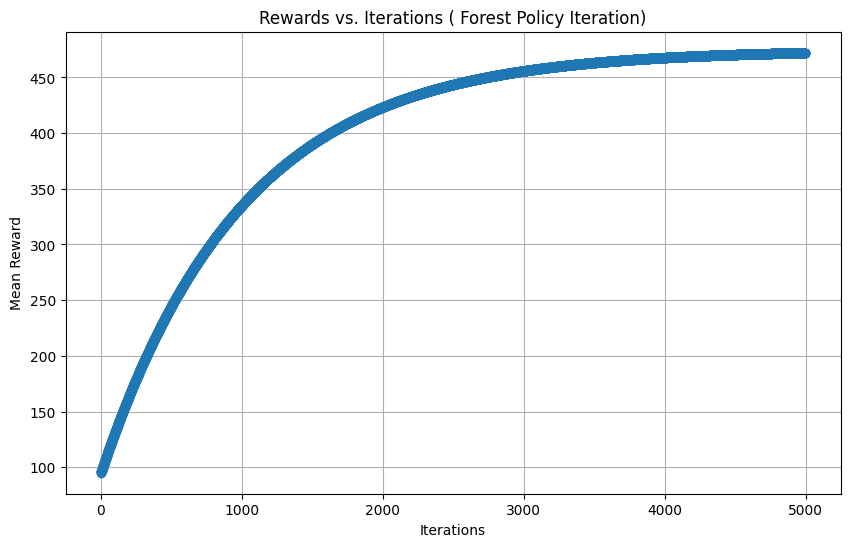

In [ ]:

P,R=mdptoolbox.example.forest(S=300)
forest_pi = PolicyIterationModified(P, R, discount=0.999)
forest_vi=ValueIteration(P,R,discount=0.999)

pi_rewards = []
vi_rewards=[]
iterations = []
max_iterations = 5000
prev_policy = None
for i in range(max_iterations):
    forest_pi.run()
    # forest_vi.run()
    pi_rewards.append(np.mean(forest_pi.V))
    # vi_rewards.append(np.mean(forest_vi.V))
    iterations.append(i)
    if prev_policy is not None and np.array_equal(forest_pi.policy, prev_policy):
        pass
    prev_policy = np.array(forest_pi.policy)
plt.figure(figsize=(10, 6))
plt.plot(iterations, pi_rewards, marker='o')
# plt.plot(iterations, vi_rewards, marker='o')
plt.title('Rewards vs. Iterations ( Forest Policy Iteration)')

plt.xlabel('Iterations')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()



[0.03186201443884339, 0.091196615938481, 0.2035459471636633, 0.4926103648230782]


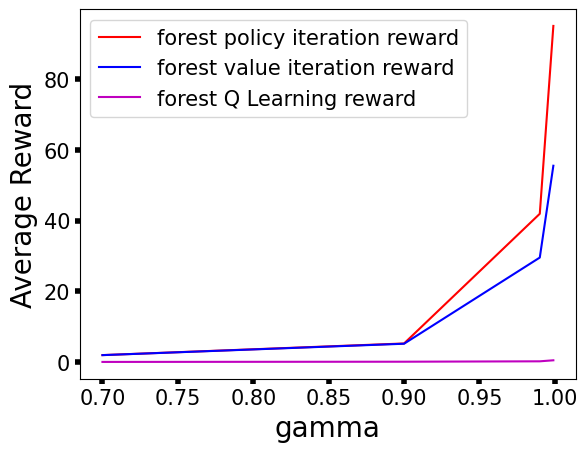

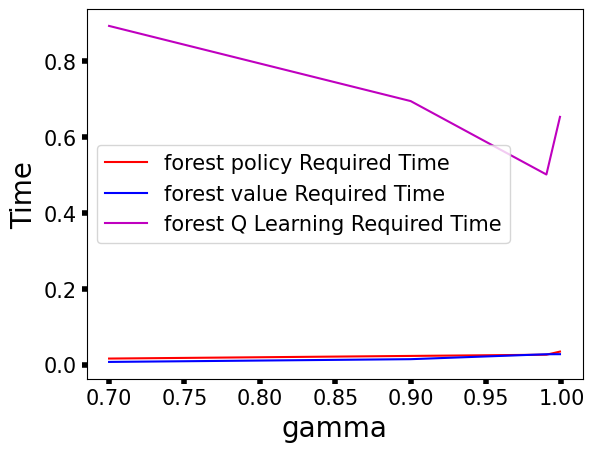

In [ ]:
5
# Gamma Effect
gamma_list=[0.7,0.9,0.99,0.999]
pi_gamma_reward=[]
vi_gamma_reward=[]
ql_gamma_reward=[]
pi_required_iteration=[]
vi_required_iteration=[]
ql_required_iteration=[]
pi_required_time=[]
vi_required_time=[]
ql_required_time=[]
P,R=mdptoolbox.example.forest(S=300)
for gamma in gamma_list:
  forest_pi = PolicyIterationModified(P, R, discount=gamma)
  forest_vi=ValueIteration(P,R,discount=gamma)
  forest_ql=QLearning(P,R,discount=gamma)
  forest_pi.run()
  forest_vi.run()
  forest_ql.run()
  pi_gamma_reward.append(np.mean(forest_pi.V))
  pi_required_iteration.append(forest_pi.iter)
  pi_required_time.append(forest_pi.time)
  vi_gamma_reward.append(np.mean(forest_vi.V))
  vi_required_iteration.append(forest_vi.iter)
  vi_required_time.append(forest_vi.time)
  ql_gamma_reward.append(np.mean(forest_ql.V))
  # ql_required_iteration.append(forest_ql.max_iter)
  ql_required_time.append(forest_ql.time)

print(ql_gamma_reward)
plt.figure()
plt.plot(gamma_list, pi_gamma_reward, label="forest policy iteration reward", c='r')
plt.plot(gamma_list, vi_gamma_reward, label="forest value iteration reward", c='b')
plt.plot(gamma_list, ql_gamma_reward, label="forest Q Learning reward", c='m')
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

# plt.figure()
# plt.plot(gamma_list, pi_required_iteration, label="forest Policy-Iteration iteration", c='r')
# plt.plot(gamma_list, vi_required_iteration, label="forest Value-Iteration iteration", c='b')
# # plt.plot(gamma_list, ql_required_iteration, label="forest Q-Learning iteration", c='m')
# plt.xlabel("gamma", fontsize=20)
# plt.ylabel("Iteration", fontsize=20)
# plt.tick_params(labelsize=15,width=4)
# plt.legend(fontsize=15)
# plt.show()

plt.figure()
plt.plot(gamma_list, pi_required_time, label="forest policy Required Time", c='r')
plt.plot(gamma_list, vi_required_time, label="forest value Required Time", c='b')
plt.plot(gamma_list, ql_required_time, label="forest Q Learning Required Time", c='m')
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()



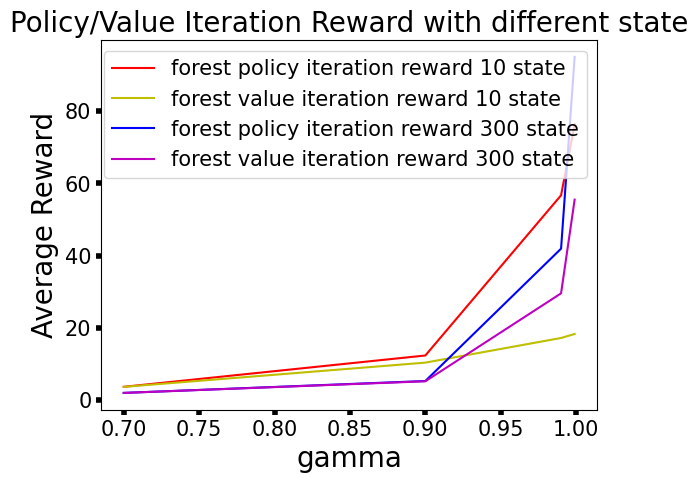

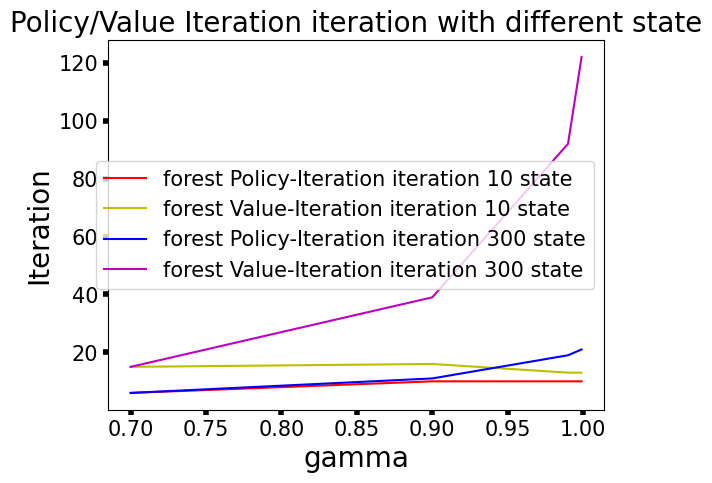

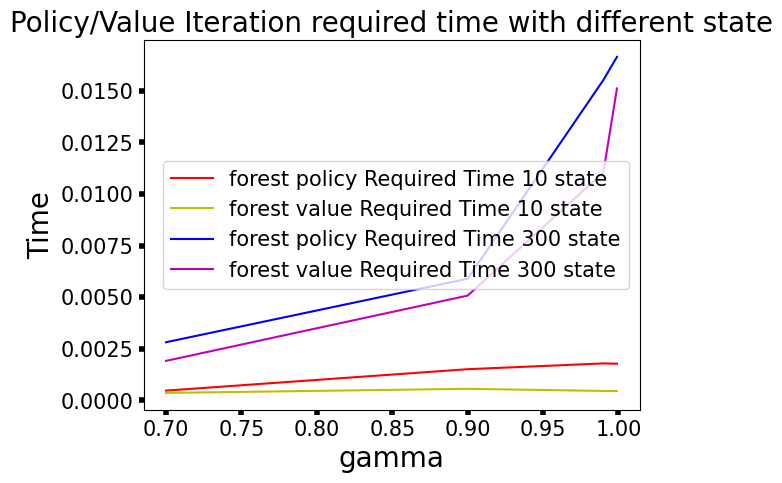

In [ ]:
# Gamma Effect
gamma_list=[0.7,0.9,0.99,0.999]
pi_gamma_reward_10=[]
vi_gamma_reward_10=[]
ql_gamma_reward_10=[]
pi_required_iteration_10=[]
vi_required_iteration_10=[]
ql_required_iteration_10=[]
pi_required_time_10=[]
vi_required_time_10=[]
ql_required_time_10=[]
P,R=mdptoolbox.example.forest(S=10)
for gamma in gamma_list:
  forest_pi = PolicyIterationModified(P, R, discount=gamma)
  forest_vi=ValueIteration(P,R,discount=gamma)
  forest_ql=QLearning(P,R,discount=gamma)
  forest_pi.run()
  forest_vi.run()
  forest_ql.run()
  pi_gamma_reward_10.append(np.mean(forest_pi.V))
  pi_required_iteration_10.append(forest_pi.iter)
  pi_required_time_10.append(forest_pi.time)
  vi_gamma_reward_10.append(np.mean(forest_vi.V))
  vi_required_iteration_10.append(forest_vi.iter)
  vi_required_time_10.append(forest_vi.time)
  ql_gamma_reward_10.append(np.mean(forest_ql.V))
  # ql_required_iteration_10.append(forest_ql.max_iter)
  ql_required_time_10.append(forest_ql.time)

plt.figure()
plt.plot(gamma_list, pi_gamma_reward_10, label="forest policy iteration reward 10 state", c='r')
plt.plot(gamma_list, vi_gamma_reward_10, label="forest value iteration reward 10 state", c='y')
plt.plot(gamma_list, pi_gamma_reward, label="forest policy iteration reward 300 state", c='b')
plt.plot(gamma_list, vi_gamma_reward, label="forest value iteration reward 300 state", c='m')
plt.title("Policy/Value Iteration Reward with different state", fontsize=20)
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()


plt.figure()
plt.plot(gamma_list, pi_required_iteration_10, label="forest Policy-Iteration iteration 10 state", c='r')
plt.plot(gamma_list, vi_required_iteration_10, label="forest Value-Iteration iteration 10 state", c='y')
plt.plot(gamma_list, pi_required_iteration, label="forest Policy-Iteration iteration 300 state", c='b')
plt.plot(gamma_list, vi_required_iteration, label="forest Value-Iteration iteration 300 state", c='m')
plt.title("Policy/Value Iteration iteration with different state", fontsize=20)
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Iteration", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(gamma_list, pi_required_time_10, label="forest policy Required Time 10 state", c='r')
plt.plot(gamma_list, vi_required_time_10, label="forest value Required Time 10 state", c='y')
plt.plot(gamma_list, pi_required_time, label="forest policy Required Time 300 state", c='b')
plt.plot(gamma_list, vi_required_time, label="forest value Required Time 300 state", c='m')
plt.title("Policy/Value Iteration required time with different state", fontsize=20)
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()




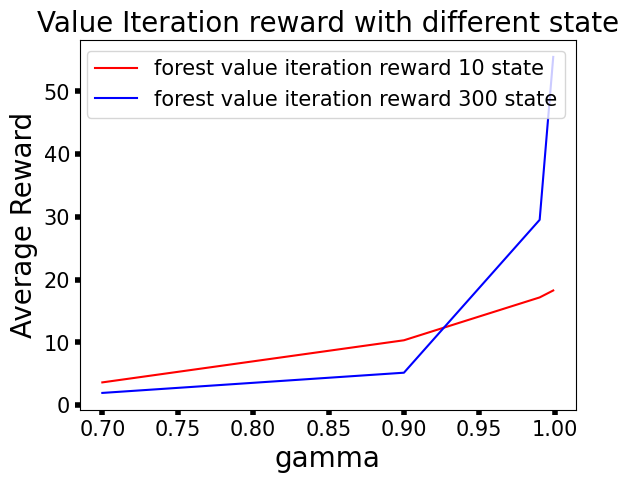

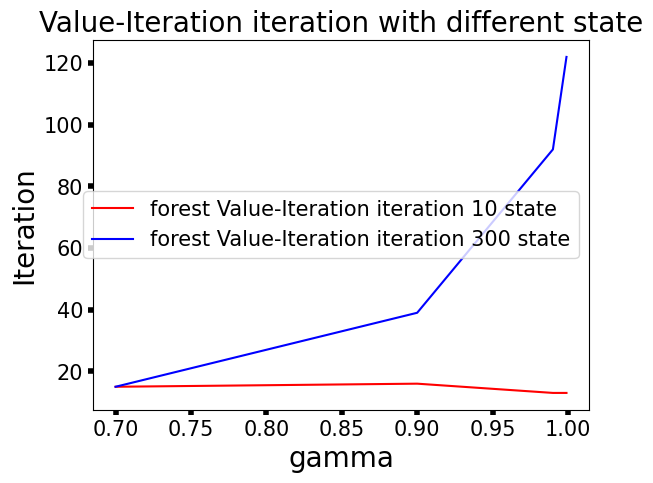

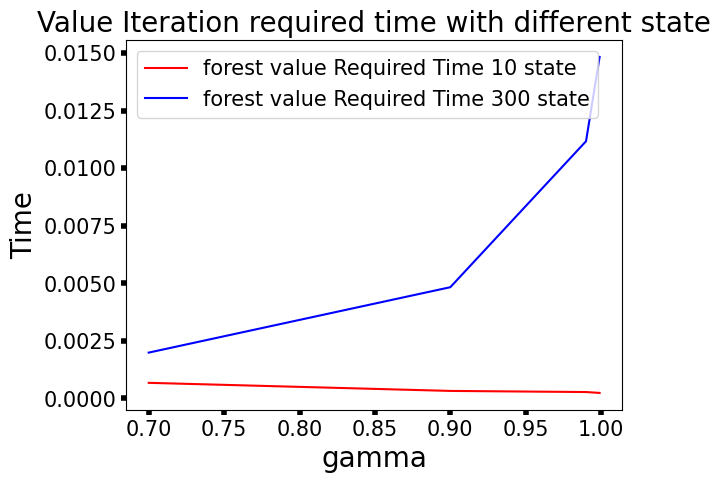

In [ ]:
plt.figure()
plt.plot(gamma_list, vi_gamma_reward_10, label="forest value iteration reward 10 state", c='r')
plt.plot(gamma_list, vi_gamma_reward, label="forest value iteration reward 300 state", c='b')
# # plt.plot(gamma_list, ql_gamma_reward_10, label="forest Q Learning reward 10 Iteration", c='m')
plt.title("Value Iteration reward with different state", fontsize=20)
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(gamma_list, vi_required_iteration_10, label="forest Value-Iteration iteration 10 state", c='r')
plt.plot(gamma_list, vi_required_iteration, label="forest Value-Iteration iteration 300 state", c='b')
plt.title("Value-Iteration iteration with different state", fontsize=20)
# # plt.plot(gamma_list, ql_required_iteration_10, label="forest Q-Learning iteration", c='m')
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Iteration", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(gamma_list, vi_required_time_10, label="forest value Required Time 10 state", c='r')
plt.plot(gamma_list, vi_required_time, label="forest value Required Time 300 state", c='b')
# # plt.plot(gamma_list, ql_required_time_10, label="forest Q Learning Required Time", c='m')
plt.title("Value Iteration required time with different state", fontsize=20)
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

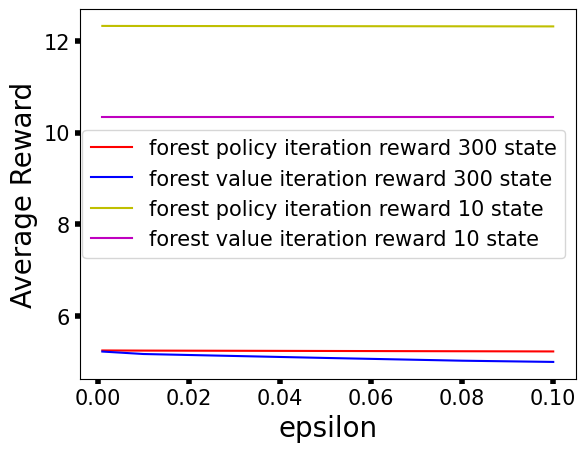

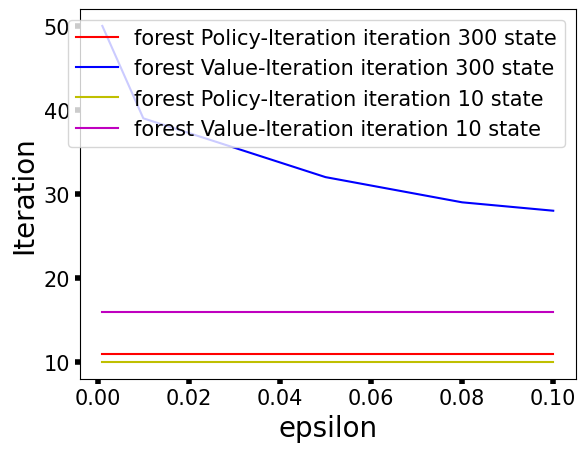

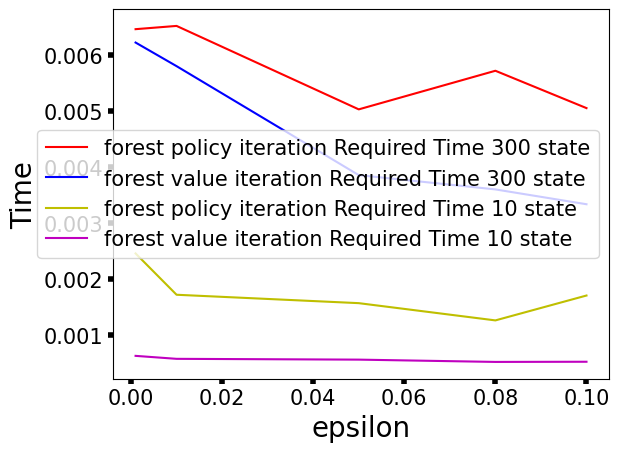

In [ ]:
# Epsilon Effect
epsilon_list=[0.001,0.01,0.05,0.08,0.1]
pi_epsilon_reward=[]
pi_required_iteration=[]
pi_required_time=[]
vi_epsilon_reward=[]
vi_required_iteration=[]
vi_required_time=[]
ql_epsilon_reward=[]
ql_required_iteration=[]
ql_required_time=[]
pi_epsilon_reward_10=[]
pi_required_iteration_10=[]
pi_required_time_10=[]
vi_epsilon_reward_10=[]
vi_required_iteration_10=[]
vi_required_time_10=[]
ql_epsilon_reward_10=[]
ql_required_iteration_10=[]
ql_required_time_10=[]
P,R=mdptoolbox.example.forest(S=300)
for epsilon in epsilon_list:
  forest_pi = PolicyIterationModified(P, R, discount=0.9, epsilon=epsilon)
  forest_vi = ValueIteration(P, R, discount=0.9, epsilon=epsilon)
  forest_ql = QLearning(P, R, discount=0.9)
  forest_pi.run()
  forest_vi.run()
  forest_ql.run()
  pi_epsilon_reward.append(np.mean(forest_pi.V))
  pi_required_iteration.append(forest_pi.iter)
  pi_required_time.append(forest_pi.time)
  vi_epsilon_reward.append(np.mean(forest_vi.V))
  vi_required_iteration.append(forest_vi.iter)
  vi_required_time.append(forest_vi.time)
  ql_epsilon_reward.append(np.mean(forest_ql.V))
  # ql_required_iteration.append(forest_ql.max_iter)
  ql_required_time.append(forest_ql.time)

P_10,R_10=mdptoolbox.example.forest(S=10)
for epsilon in epsilon_list:
  forest_pi_10 = PolicyIterationModified(P_10, R_10, discount=0.9, epsilon=epsilon)
  forest_vi_10 = ValueIteration(P_10, R_10, discount=0.9, epsilon=epsilon)
  forest_ql_10 = QLearning(P_10, R_10, discount=0.9)
  forest_pi_10.run()
  forest_vi_10.run()
  forest_ql_10.run()
  pi_epsilon_reward_10.append(np.mean(forest_pi_10.V))
  pi_required_iteration_10.append(forest_pi_10.iter)
  pi_required_time_10.append(forest_pi_10.time)
  vi_epsilon_reward_10.append(np.mean(forest_vi_10.V))
  vi_required_iteration_10.append(forest_vi_10.iter)
  vi_required_time_10.append(forest_vi_10.time)
  ql_epsilon_reward_10.append(np.mean(forest_ql_10.V))
  # ql_required_iteration.append(forest_ql.max_iter)
  ql_required_time_10.append(forest_ql_10.time)

plt.figure()
plt.plot(epsilon_list, pi_epsilon_reward, label="forest policy iteration reward 300 state",c='r')
plt.plot(epsilon_list, vi_epsilon_reward, label="forest value iteration reward 300 state",c='b')
plt.plot(epsilon_list, pi_epsilon_reward_10, label="forest policy iteration reward 10 state",c='y')
plt.plot(epsilon_list, vi_epsilon_reward_10, label="forest value iteration reward 10 state",c='m')
# plt.plot(epsilon_list, ql_epsilon_reward, label="forest Q Learning reward",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(epsilon_list, pi_required_iteration, label="forest Policy-Iteration iteration 300 state",c='r')
plt.plot(epsilon_list, vi_required_iteration, label="forest Value-Iteration iteration 300 state",c='b')
plt.plot(epsilon_list, pi_required_iteration_10, label="forest Policy-Iteration iteration 10 state",c='y')
plt.plot(epsilon_list, vi_required_iteration_10, label="forest Value-Iteration iteration 10 state",c='m')
# plt.plot(epsilon_list, ql_required_iteration, label="forest Q-Learning iteration",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Iteration", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(epsilon_list, pi_required_time, label="forest policy iteration Required Time 300 state",c='r')
plt.plot(epsilon_list, vi_required_time, label="forest value iteration Required Time 300 state",c='b')
plt.plot(epsilon_list, pi_required_time_10, label="forest policy iteration Required Time 10 state",c='y')
plt.plot(epsilon_list, vi_required_time_10, label="forest value iteration Required Time 10 state",c='m')
# plt.plot(epsilon_list, ql_required_time, label="forest Q Learning Required Time",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()


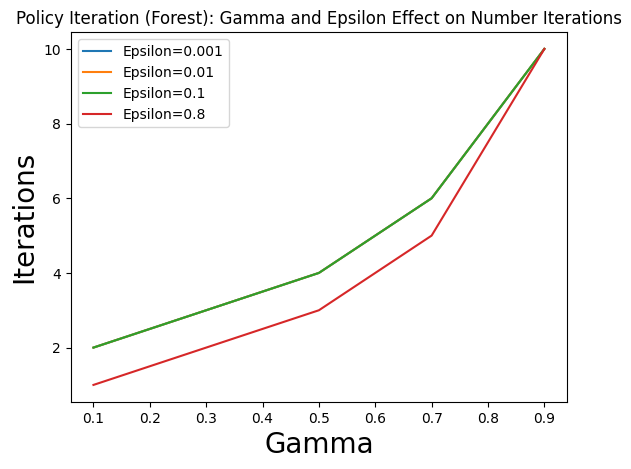

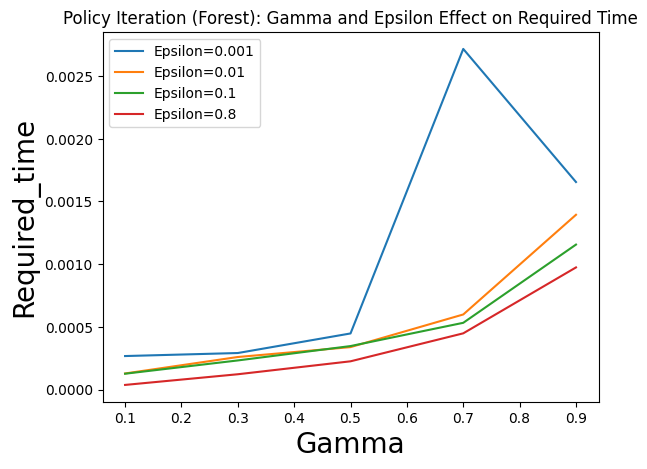

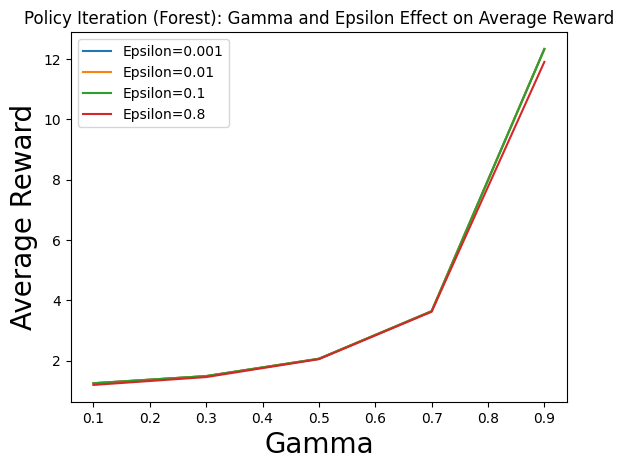

In [ ]:

epsilon_list=[0.001,0.01,0.1,0.8]
pi_value_function=[]
pi_reward=[]
pi_iter_array=[]
pi_time_array=[]
P,R=mdptoolbox.example.forest(S=10)
for epsilon in epsilon_list:
  PI_value_function=[]
  PI_iter_array=[]
  PI_time_array=[]
  for i in gamma_list:
    PI=mdptoolbox.mdp.PolicyIterationModified(P,R,i+0.0001, epsilon=epsilon)
    PI.run()
    PI_value_function.append(np.mean(PI.V))
    PI_iter_array.append(PI.iter)
    PI_time_array.append(PI.time)
  pi_value_function.append(PI_value_function)
  pi_iter_array.append(PI_iter_array)
  pi_time_array.append(PI_time_array)

plt.figure()
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, pi_iter_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Iterations", fontsize=20)
  plt.title("Policy Iteration (Forest): Gamma and Epsilon Effect on Number Iterations")
  plt.legend()

plt.figure()
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, pi_time_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Required_time", fontsize=20)
  plt.title("Policy Iteration (Forest): Gamma and Epsilon Effect on Required Time")
  plt.legend()

plt.figure()
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, pi_value_function[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average Reward", fontsize=20)
  plt.title("Policy Iteration (Forest): Gamma and Epsilon Effect on Average Reward")
  plt.legend()

mdp tool box forest example

In [ ]:

epsilon_list=[0.001,0.01,0.1,0.8]
value_function=[]
vi_reward=[]
vi_iter_array=[]
vi_time_array=[]
for epsilon in epsilon_list:
  VI_value_function=[]
  VI_iter_array=[]
  VI_time_array=[]
  for i in gamma_list:
    VI=mdptoolbox.mdp.ValueIteration(P,R,i+0.0001, epsilon=epsilon)
    VI.run()
    VI_value_function.append(np.mean(VI.V))
    VI_iter_array.append(VI.iter)
    VI_time_array.append(VI.time)
  value_function.append(VI_value_function)
  vi_iter_array.append(VI_iter_array)
  vi_time_array.append(VI_time_array)

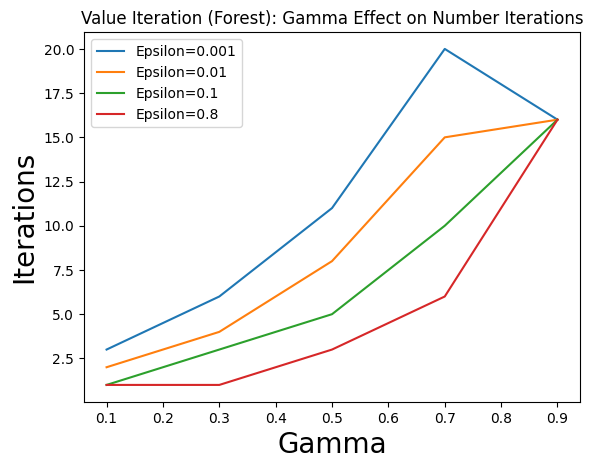

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, vi_iter_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Iterations", fontsize=20)
  plt.title("Value Iteration (Forest): Gamma Effect on Number Iterations")
  plt.legend()

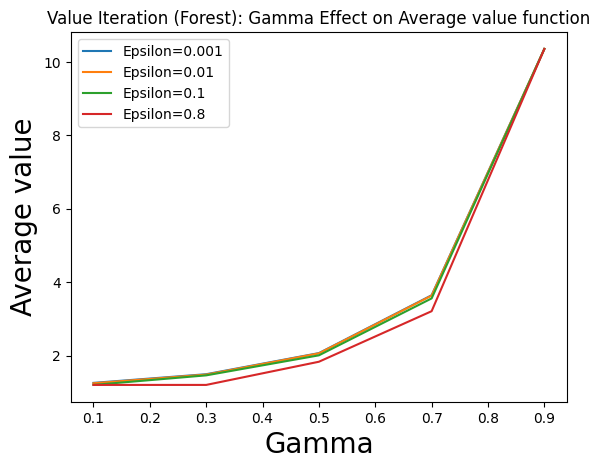

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, value_function[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average value", fontsize=20)
  plt.title("Value Iteration (Forest): Gamma Effect on Average value function")
  plt.legend()

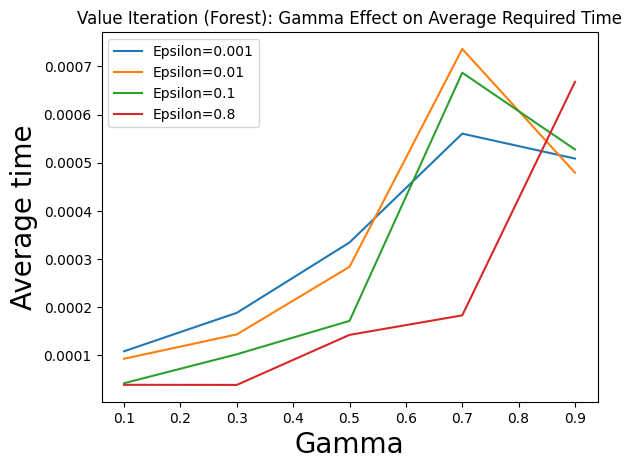

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, vi_time_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average time", fontsize=20)
  plt.title("Value Iteration (Forest): Gamma Effect on Average Required Time")
  plt.legend()

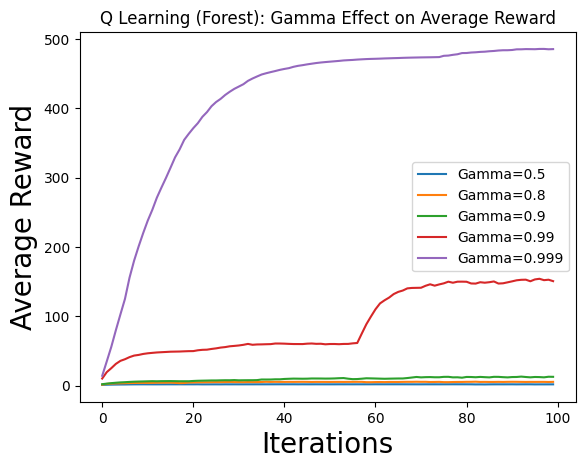

In [ ]:

P,R=mdptoolbox.example.forest(S=10)
QL_gamma=[0.5,0.8,0.9,0.99,0.999]
total_ql_reward=[]
for gamma in QL_gamma:
  forest_ql = QLearning(P,R, discount=gamma)
  ql_rewards = []
  iterations = []
  max_iterations = 100
  for i in range(max_iterations):
    forest_ql.run()
    ql_rewards.append(np.mean(forest_ql.V))
    iterations.append(i)
  total_ql_reward.append(ql_rewards)
for i, gamma in enumerate(QL_gamma):
  plt.plot(iterations, total_ql_reward[i], label=f'Gamma={gamma}')
  plt.xlabel("Iterations", fontsize=20)
  plt.ylabel("Average Reward", fontsize=20)
  plt.title("Q Learning (Forest): Gamma Effect on Average Reward")
  plt.legend()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


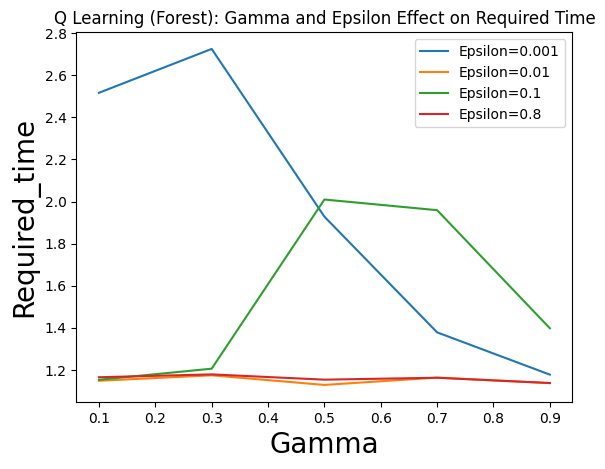

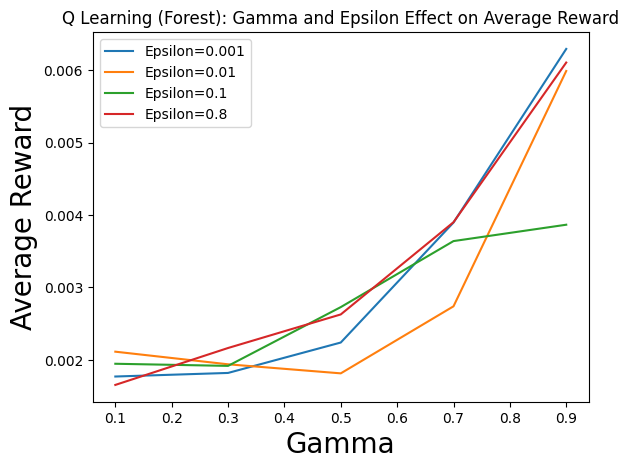

In [ ]:
epsilon_list=[0.001,0.01,0.1,0.8]
ql_value_function=[]
ql_reward=[]
ql_iter_array=[]
ql_time_array=[]
P,R=mdptoolbox.example.forest(S=1000)
for epsilon in epsilon_list:
  QL_value_function=[]
  QL_iter_array=[]
  QL_time_array=[]
  for i in gamma_list:
    QL=QLearning(P,R,i+0.0001)
    QL.run()
    QL_value_function.append(np.mean(QL.V))
    # QL_iter_array.append(QL.iter)
    QL_time_array.append(QL.time)
  ql_value_function.append(QL_value_function)
  # ql_iter_array.append(QL_iter_array)
  ql_time_array.append(QL_time_array)

# plt.figure()
# for i, epsilon in enumerate(epsilon_list):
#   plt.plot(gamma_list, ql_iter_array[i], label=f'Epsilon={epsilon}')
#   plt.xlabel("Gamma", fontsize=20)
#   plt.ylabel("Iterations", fontsize=20)
#   plt.title("Q Learning (Forest): Gamma and Epsilon Effect on Number Iterations")
#   plt.legend()

plt.figure()
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, ql_time_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Required_time", fontsize=20)
  plt.title("Q Learning (Forest): Gamma and Epsilon Effect on Required Time")
  plt.legend()

plt.figure()
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma_list, ql_value_function[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average Reward", fontsize=20)
  plt.title("Q Learning (Forest): Gamma and Epsilon Effect on Average Reward")
  plt.legend()

# **Frozen Lake**

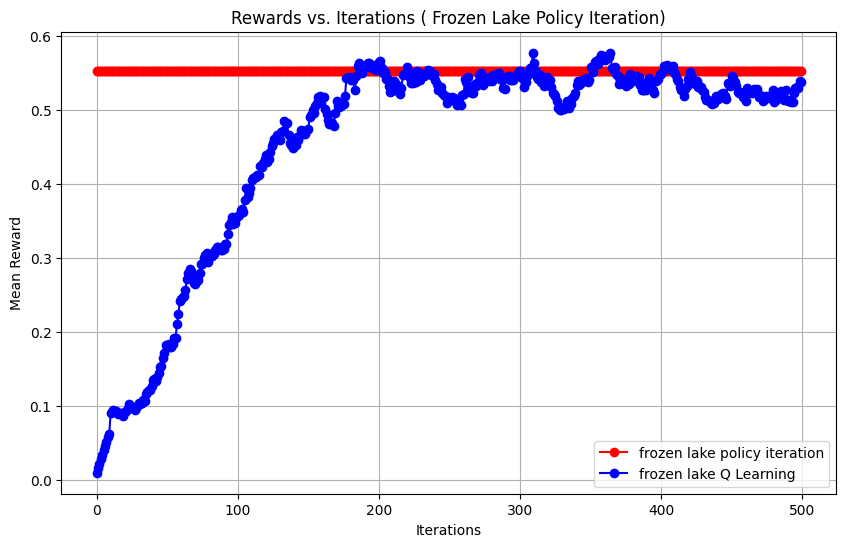

In [ ]:
env=gym.make("FrozenLake-v1")
number_states=env.observation_space.n
number_actions=env.action_space.n
P_fl=np.zeros((number_actions,number_states,number_states))
R_fl=np.zeros((number_states, number_actions))
envP=env.unwrapped.P
for state in range(number_states):
  for action in range(number_actions):
    transitions=envP[state][action]
    for prob, new_state, reward,_ in transitions:
      P_fl[action][state][new_state]+=prob
      R_fl[state][action]+=prob*reward
for i in
fl_pi = PolicyIterationModified(P_fl, R_fl, discount=0.9999)
fl_pi_rewards = []
iterations = []
max_iterations = 500
prev_policy_pi = None
for i in range(max_iterations):
    fl_pi.run()
    fl_pi_rewards.append(np.mean(fl_pi.V))
    iterations.append(i)
    if prev_policy is not None and np.array_equal(fl_pi.policy, prev_policy_pi):
        pass
    prev_policy_pi = np.array(fl_pi.policy)





fl_ql = QLearning(P_fl, R_fl, discount=0.9999)
fl_ql_rewards = []
max_iterations = 500
prev_policy_ql = None
for i in range(max_iterations):
    fl_ql.run()
    fl_ql_rewards.append(np.mean(fl_ql.V))
    if prev_policy is not None and np.array_equal(fl_ql.policy, prev_policy_ql):
        pass
    prev_policy_ql = np.array(fl_ql.policy)



plt.figure(figsize=(10, 6))
plt.plot(iterations, fl_pi_rewards, marker='o',c='r', label='frozen lake policy iteration')
plt.plot(iterations, fl_ql_rewards, marker='o',c='b', label='frozen lake Q Learning')
plt.title('Rewards vs. Iterations ( Frozen Lake Policy Iteration)')
plt.xlabel('Iterations')
plt.ylabel('Mean Reward')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
env=gym.make("FrozenLake-v1")
number_states=env.observation_space.n
number_actions=env.action_space.n
P_fl=np.zeros((number_actions,number_states,number_states))
R_fl=np.zeros((number_states, number_actions))
envP=env.unwrapped.P
for state in range(number_states):
  for action in range(number_actions):
    transitions=envP[state][action]
    for prob, new_state, reward,_ in transitions:
      P_fl[action][state][new_state]+=prob
      R_fl[state][action]+=prob*reward
epsilon_list=[0.001,0.01,0.1,0.8]
gamma=[0.7,0.8,0.9,0.99,0.999]
value_function=[]
fl_reward=[]
vi_iter_array=[]
vi_time_array=[]
for epsilon in epsilon_list:
  VI_value_function=[]
  FL_reward=[]
  VI_iter_array=[]
  VI_time_array=[]
  for i in gamma:
    VI=mdptoolbox.mdp.ValueIteration(P_fl,R_fl,i+0.0001, epsilon=epsilon)
    VI.run()
    VI_value_function.append(np.mean(VI.V))
    VI_iter_array.append(VI.iter)
    VI_time_array.append(VI.time)
  value_function.append(VI_value_function)
  fl_reward.append(FL_reward)
  vi_iter_array.append(VI_iter_array)
  vi_time_array.append(VI_time_array)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


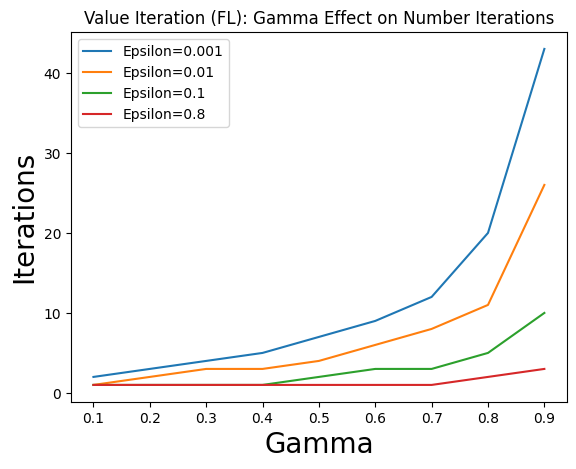

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma, vi_iter_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Iterations", fontsize=20)
  plt.title("Value Iteration (FL): Gamma Effect on Number Iterations")
  plt.legend()

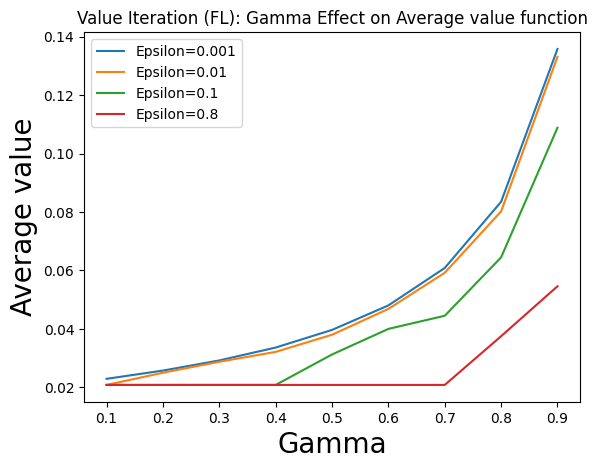

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma, value_function[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average value", fontsize=20)
  plt.title("Value Iteration (FL): Gamma Effect on Average value function")
  plt.legend()

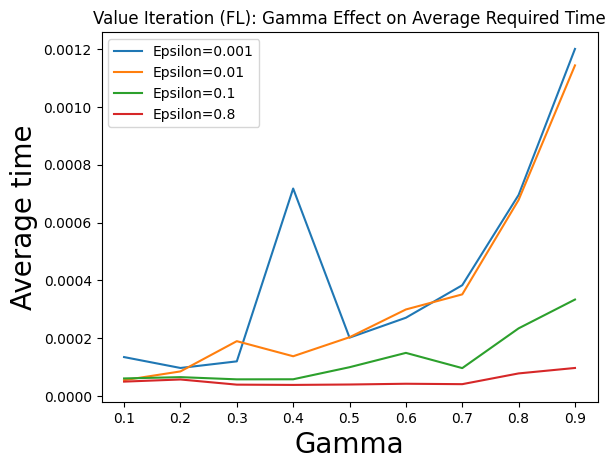

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma, vi_time_array[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Average time", fontsize=20)
  plt.title("Value Iteration (FL): Gamma Effect on Average Required Time")
  plt.legend()

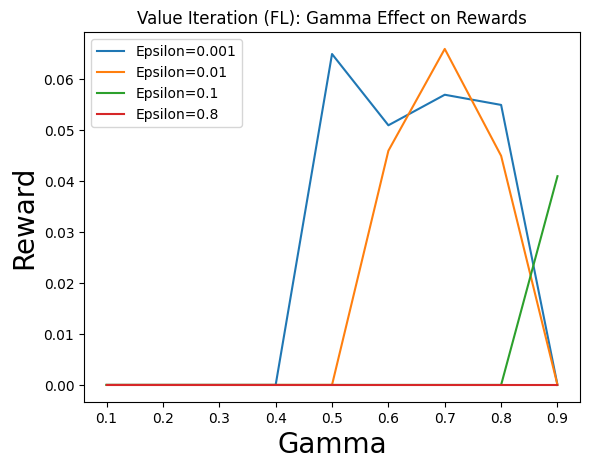

In [ ]:
for i, epsilon in enumerate(epsilon_list):
  plt.plot(gamma, fl_reward[i], label=f'Epsilon={epsilon}')
  plt.xlabel("Gamma", fontsize=20)
  plt.ylabel("Reward", fontsize=20)
  plt.title("Value Iteration (FL): Gamma Effect on Rewards")
  plt.legend()

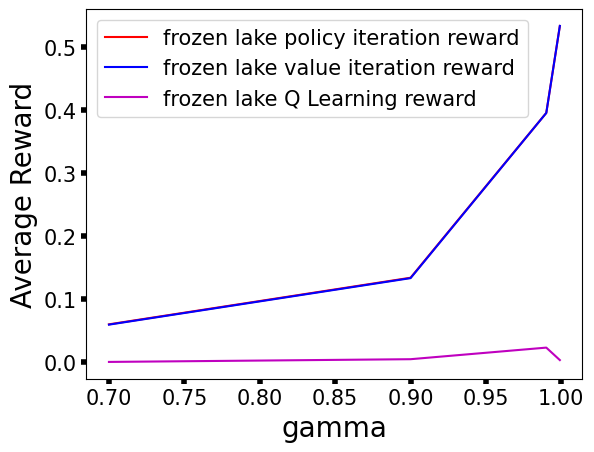

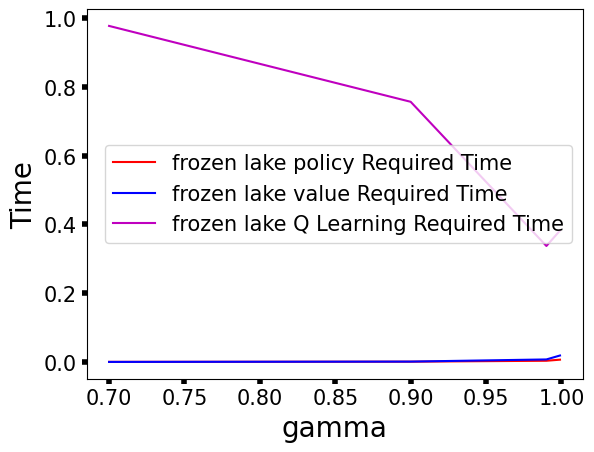

In [ ]:
# Gamma Effect
env=gym.make("FrozenLake-v1")
number_states=env.observation_space.n
number_actions=env.action_space.n
P_fl=np.zeros((number_actions,number_states,number_states))
R_fl=np.zeros((number_states, number_actions))
envP=env.unwrapped.P
for state in range(number_states):
  for action in range(number_actions):
    transitions=envP[state][action]
    for prob, new_state, reward,_ in transitions:
      P_fl[action][state][new_state]+=prob
      R_fl[state][action]+=prob*reward
gamma_list=[0.7,0.9,0.99,0.999]
fl_pi_gamma_reward=[]
fl_vi_gamma_reward=[]
fl_ql_gamma_reward=[]
fl_pi_required_iteration=[]
fl_vi_required_iteration=[]
fl_ql_required_iteration=[]
fl_pi_required_time=[]
fl_vi_required_time=[]
fl_ql_required_time=[]
for gamma in gamma_list:
  fl_pi = PolicyIterationModified(P_fl, R_fl, discount=gamma)
  fl_vi=ValueIteration(P_fl,R_fl,discount=gamma)
  fl_ql=QLearning(P_fl,R_fl,discount=gamma)
  fl_pi.run()
  fl_vi.run()
  fl_ql.run()
  fl_pi_gamma_reward.append(np.mean(fl_pi.V))
  fl_pi_required_iteration.append(fl_pi.iter)
  fl_pi_required_time.append(fl_pi.time)
  fl_vi_gamma_reward.append(np.mean(fl_vi.V))
  fl_vi_required_iteration.append(fl_vi.iter)
  fl_vi_required_time.append(fl_vi.time)
  fl_ql_gamma_reward.append(np.mean(fl_ql.V))
  # ql_required_iteration.append(forest_ql.max_iter)
  fl_ql_required_time.append(fl_ql.time)

plt.figure()
plt.plot(gamma_list, fl_pi_gamma_reward, label="frozen lake policy iteration reward", c='r')
plt.plot(gamma_list, fl_vi_gamma_reward, label="frozen lake value iteration reward", c='b')
plt.plot(gamma_list, fl_ql_gamma_reward, label="frozen lake Q Learning reward", c='m')
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

# plt.figure()
# plt.plot(gamma_list, fl_pi_required_iteration, label="frozen lake Policy-Iteration iteration", c='r')
# plt.plot(gamma_list, fl_vi_required_iteration, label="frozen lake Value-Iteration iteration", c='b')
# plt.plot(gamma_list, ql_required_iteration, label="forest Q-Learning iteration", c='m')
# plt.xlabel("gamma", fontsize=20)
# plt.ylabel("Iteration", fontsize=20)
# plt.tick_params(labelsize=15,width=4)
# plt.legend(fontsize=15)
# plt.show()

plt.figure()
plt.plot(gamma_list, fl_pi_required_time, label="frozen lake policy Required Time", c='r')
plt.plot(gamma_list, fl_vi_required_time, label="frozen lake value Required Time", c='b')
plt.plot(gamma_list, fl_ql_required_time, label="frozen lake Q Learning Required Time", c='m')
plt.xlabel("gamma", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


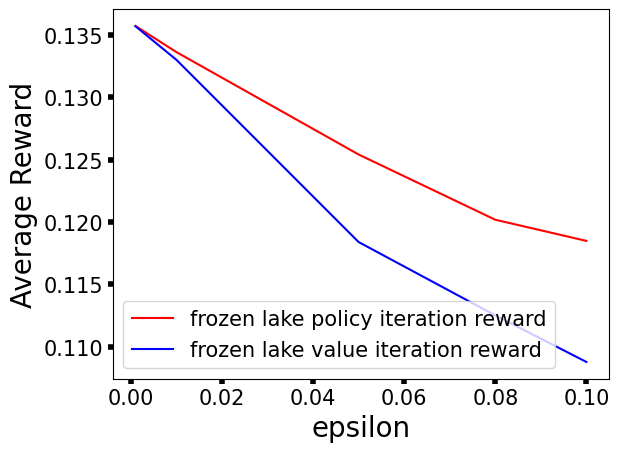

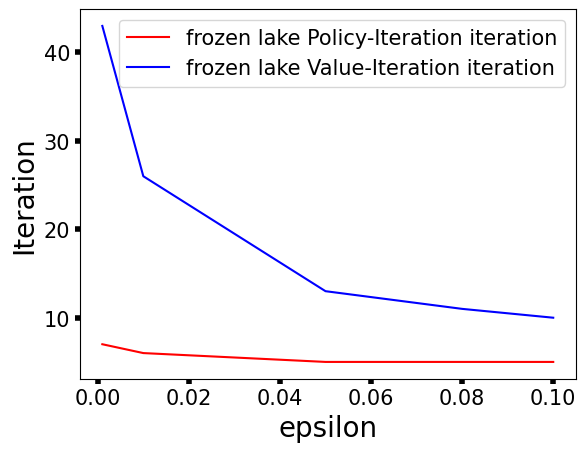

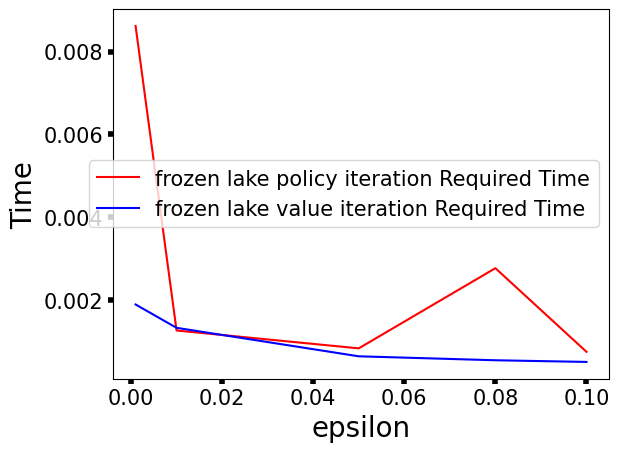

In [ ]:
# Epsilon Effect
env=gym.make("FrozenLake-v1")
number_states=env.observation_space.n
number_actions=env.action_space.n
P_fl=np.zeros((number_actions,number_states,number_states))
R_fl=np.zeros((number_states, number_actions))
envP=env.unwrapped.P
for state in range(number_states):
  for action in range(number_actions):
    transitions=envP[state][action]
    for prob, new_state, reward,_ in transitions:
      P_fl[action][state][new_state]+=prob
      R_fl[state][action]+=prob*reward
epsilon_list=[0.001,0.01,0.05,0.08,0.1]
fl_pi_epsilon_reward=[]
fl_pi_required_iteration=[]
fl_pi_required_time=[]
fl_vi_epsilon_reward=[]
fl_vi_required_iteration=[]
fl_vi_required_time=[]
fl_ql_epsilon_reward=[]
fl_ql_required_iteration=[]
fl_ql_required_time=[]
P,R=mdptoolbox.example.forest(S=1000)
for epsilon in epsilon_list:
  fl_pi = PolicyIterationModified(P_fl, R_fl, discount=0.9, epsilon=epsilon)
  fl_vi = ValueIteration(P_fl, R_fl, discount=0.9, epsilon=epsilon)
  # fl_ql = QLearning(P_fl, R_fl, discount=0.9, epsilon=epsilon)
  fl_pi.run()
  fl_vi.run()
  fl_ql.run()
  fl_pi_epsilon_reward.append(np.mean(fl_pi.V))
  fl_pi_required_iteration.append(fl_pi.iter)
  fl_pi_required_time.append(fl_pi.time)
  fl_vi_epsilon_reward.append(np.mean(fl_vi.V))
  fl_vi_required_iteration.append(fl_vi.iter)
  fl_vi_required_time.append(fl_vi.time)
  fl_ql_epsilon_reward.append(np.mean(fl_ql.V))
  # ql_required_iteration.append(forest_ql.max_iter)
  fl_ql_required_time.append(fl_ql.time)

plt.figure()
plt.plot(epsilon_list, fl_pi_epsilon_reward, label="frozen lake policy iteration reward",c='r')
plt.plot(epsilon_list, fl_vi_epsilon_reward, label="frozen lake value iteration reward",c='b')
# plt.plot(epsilon_list, fl_ql_epsilon_reward, label="frozen lake Q Learning reward",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(epsilon_list, fl_pi_required_iteration, label="frozen lake Policy-Iteration iteration",c='r')
plt.plot(epsilon_list, fl_vi_required_iteration, label="frozen lake Value-Iteration iteration",c='b')
# plt.plot(epsilon_list, ql_required_iteration, label="forest Q-Learning iteration",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Iteration", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()

plt.figure()
plt.plot(epsilon_list, fl_pi_required_time, label="frozen lake policy iteration Required Time",c='r')
plt.plot(epsilon_list, fl_vi_required_time, label="frozen lake value iteration Required Time",c='b')
# plt.plot(epsilon_list, fl_ql_required_time, label="frozen lake Q Learning Required Time",c='m')
plt.xlabel("epsilon", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.tick_params(labelsize=15,width=4)
plt.legend(fontsize=15)
plt.show()